In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#Getting the Data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/",one_hot=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [5]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [6]:
type(mnist.train.images)

numpy.ndarray

In [7]:
mnist.train.images.shape

(55000, 784)

In [8]:
mnist.train.images[2034].shape

(784,)

In [0]:
sample = mnist.train.images[2034].reshape(28,28)

In [10]:
sample.shape

(28, 28)

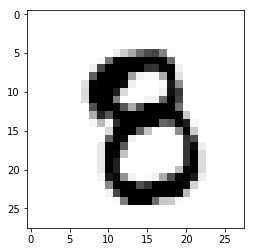

In [11]:
plt.imshow(sample,cmap='Greys')

In [0]:
#Basic Parameters
learning_rate = 0.001
training_epochs = 15   #No. of training cycles
batch_size = 100       #Size

In [0]:
#Networking Parameters(which determine how our neural network looks like)
n_classes=10
n_samples=mnist.train.num_examples
n_input=784
n_hidden_1=256
n_hidden_2=256

In [0]:
def multilayer_perceptron(x, weights, biases):
    '''
    x : Place Holder for Data Input
    weights: Dictionary of weights
    biases: Dicitionary of biases
    '''
    
    # First Hidden layer with RELU activation
    #f(x) = (x * w) + b
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    
    # Second Hidden layer with RELU activation
    #f(x) = (layer_1 * w) + b
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    
    # Last Output layer with linear activation
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    return out_layer

In [0]:
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}

In [0]:
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

In [0]:
x = tf.placeholder("float", [None, n_input])
y = tf.placeholder("float", [None, n_classes])

In [0]:
pred = multilayer_perceptron(x, weights, biases)

In [0]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred,labels= y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

In [0]:
# Initializing the variables
init = tf.initialize_all_variables()

## Training the model

In [0]:
Xsamp,ysamp = mnist.train.next_batch(1)

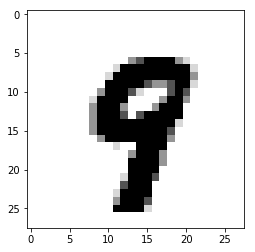

In [24]:
plt.imshow(Xsamp.reshape(28,28),cmap='Greys')

In [25]:
print(ysamp)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


## Running the session

In [26]:
# Launch the session
sess = tf.InteractiveSession()

# Intialize all the variables
sess.run(init)

# Training Epochs
# Essentially the max amount of loops possible before we stop
# May stop earlier if cost/loss limit was set
for epoch in range(training_epochs):

    # Start with cost = 0.0
    avg_cost = 0.0

    # Convert total number of batches to integer
    total_batch = int(n_samples/batch_size)

    # Loop over all batches
    for i in range(total_batch):

        # Grab the next batch of training data and labels
        batch_x, batch_y = mnist.train.next_batch(batch_size)

        # Feed dictionary for optimization and loss value
        # Returns a tuple, but we only need 'c' the cost
        # So we set an underscore as a "throwaway"
        _, c = sess.run([optimizer, cost], feed_dict={x: batch_x, y: batch_y})

        # Compute average loss
        avg_cost += c / total_batch

    print("Epoch: {} cost={:.4f}".format(epoch+1,avg_cost))

print("Model has completed {} Epochs of Training".format(training_epochs))

Epoch: 1 cost=169.2870
Epoch: 2 cost=40.6315
Epoch: 3 cost=25.6345
Epoch: 4 cost=17.7981
Epoch: 5 cost=12.8121
Epoch: 6 cost=9.4321
Epoch: 7 cost=7.1042
Epoch: 8 cost=5.2974
Epoch: 9 cost=3.9862
Epoch: 10 cost=3.0033
Epoch: 11 cost=2.2396
Epoch: 12 cost=1.6719
Epoch: 13 cost=1.3550
Epoch: 14 cost=1.0577
Epoch: 15 cost=0.7259
Model has completed 15 Epochs of Training


## Model Evaluation

In [0]:
# Test model
correct_predictions = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))

In [28]:
print(correct_predictions[0])

Tensor("strided_slice:0", shape=(), dtype=bool)


In order to get a numerical value for our predictions we will need to use tf.cast to cast the Tensor of booleans back into a Tensor of Floating point values in order to take the mean of it.

In [0]:
correct_predictions = tf.cast(correct_predictions, "float")

In [30]:
print(correct_predictions[0])

Tensor("strided_slice_1:0", shape=(), dtype=float32)


Now we use the tf.reduce_mean function in order to grab the mean of the elements across the tensor.

In [0]:
accuracy = tf.reduce_mean(correct_predictions)

In [33]:
type(accuracy)

tensorflow.python.framework.ops.Tensor

 Now we can call the MNIST test labels and images and evaluate our accuracy!

In [34]:
mnist.test.labels

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [35]:
mnist.test.images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

The eval() method allows you to directly evaluates this tensor in a `Session` without needing to call tf.sess()

In [36]:
print("Accuracy:", accuracy.eval({x: mnist.test.images, y: mnist.test.labels}))

Accuracy: 0.9442


 Running for more training epochs with this data (around 20,000) can produce accuracy around 99%.